In [1]:
import pandas as pd
import numpy as np 
import sqlite3
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import scipy as sp
import sqlite3
import re
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats

%matplotlib inline

In [20]:
conn = sqlite3.connect("/Users/jackmackle/py_work/uranium-twitter-bot/notebooks/sept-check-in/storage.db")
df = pd.read_sql_query("SELECT * FROM tweets", conn)
conn.close()

In [21]:
sid = SentimentIntensityAnalyzer()

tw_text_list = df["full_text"].tolist()
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

df["compound_pol"] = compound

In [22]:
strip_date = list(map(lambda x: x.split()[0], df["created_at"].to_list()))
df["stripdate"] = strip_date
df_date_group = df[["stripdate", "compound_pol"]].groupby("stripdate", as_index=False).agg(['count','mean']).reset_index()

In [28]:
df_date_group = df_date_group[(df_date_group["stripdate"] > "2022-02-11") & (df_date_group["stripdate"] < "2022-09-11")]

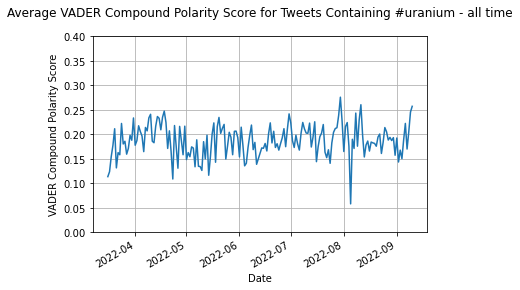

In [33]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(df_date_group["stripdate"].astype('datetime64[ns]'),
         df_date_group["compound_pol"]["mean"],
         label="Compound Polarity Score")
    
ax1.set_title("Average VADER Compound Polarity Score for Tweets Containing #uranium - all time",
              pad=20)
ax1.set_ylabel("VADER Compound Polarity Score")
ax1.set_xlabel("Date")
ax1.set_ylim([0,.4])

#date_form = DateFormatter("%M")
#ax1.xaxis.set_major_formatter(date_form)

#datemin = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').min())
#datemax = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').max())
#ax1.set_xlim(datemin, datemax)

ax1.format_xdata = mdates.DateFormatter('%M')
ax1.grid(True)
fig.autofmt_xdate()

plt.show()


In [38]:
df_date_group[df_date_group['compound_pol']['mean']==df_date_group['compound_pol']['mean'].max()]

stripdate compound_pol          
                       count      mean
136  2022-07-30          338  0.275775

In [35]:
df_last_mon = df_date_group[(df_date_group["stripdate"] > "2022-08-11") & (df_date_group["stripdate"] < "2022-09-11")]

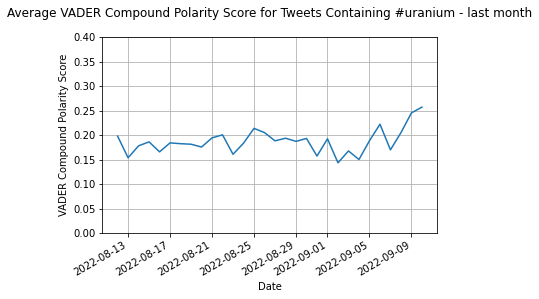

In [36]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(df_last_mon["stripdate"].astype('datetime64[ns]'),
         df_last_mon["compound_pol"]["mean"],
         label="Compound Polarity Score")
    
ax1.set_title("Average VADER Compound Polarity Score for Tweets Containing #uranium - last month",
              pad=20)
ax1.set_ylabel("VADER Compound Polarity Score")
ax1.set_xlabel("Date")
ax1.set_ylim([0,.4])

#date_form = DateFormatter("%M")
#ax1.xaxis.set_major_formatter(date_form)

#datemin = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').min())
#datemax = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').max())
#ax1.set_xlim(datemin, datemax)

ax1.format_xdata = mdates.DateFormatter('%M')
ax1.grid(True)
fig.autofmt_xdate()

plt.show()

In [27]:
df_date_group

stripdate compound_pol          
                       count      mean
0    2022-03-16          472  0.113467
1    2022-03-17          633  0.123583
2    2022-03-18          493  0.154629
3    2022-03-19          319  0.177824
4    2022-03-20          278  0.211335
..          ...          ...       ...
175  2022-09-07          490  0.169896
176  2022-09-08          666  0.204958
177  2022-09-09          620  0.245406
178  2022-09-10          311  0.257135
179  2022-09-11           32  0.150113

[180 rows x 3 columns]

In [39]:
df_date_group[df_date_group['compound_pol']['mean']==df_date_group['compound_pol']['mean'].min()]

stripdate compound_pol          
                       count      mean
142  2022-08-05          394  0.057878

In [53]:
df[df["stripdate"] == "2022-08-05"][["user_name", "full_text", "compound_pol"]].sort_values(by=["compound_pol"]).to_csv("/Users/jackmackle/desktop/test.csv")

In [52]:
df

,tweet_id,created_at,in_reply_to_status,full_text,verified,retweet_count,user_id,user_name,user_followers_coubt,compound_pol,stripdate
0,1504598598071341064,2022-03-17 23:20:34+00:00,None,#US Senators have introduced a bill to ban imp...,0,0,1254595230814203904,ltd_gti,569,-0.5574,2022-03-17
1,1504598555872436226,2022-03-17 23:20:24+00:00,None,🎯 #ETF Hunting by Keyword 🔑\n\n🔎 Hey 🤖! Show m...,0,0,1225275462701723649,etf_dividend,220,0.6467,2022-03-17
2,1504598250388611073,2022-03-17 23:19:11+00:00,None,"Actually, it means a lot if you're long #gold ...",0,1,2818081640,duediligenceguy,15467,0.4215,2022-03-17
3,1504598123045392384,2022-03-17 23:18:41+00:00,None,What is everyone’s favorite Uranium stock?! #u...,0,0,1260741614508691457,RealMattMoney,3846,0.5093,2022-03-17
4,1504598101771706368,2022-03-17 23:18:36+00:00,1504597171898777607,@brandon_munro The most Important video #Urani...,0,1,2337121453,derekquick1,8567,-0.3626,2022-03-17
...,...,...,...,...,...,...,...,...,...,...,...
64304,1568463308302462977,2022-09-10 04:56:07+00:00,None,#Dougcasey saying #uranium #miners going up an...,0,0,257905549,_Morrar_,150,0.0000,2022-09-10
64305,1568461991890636802,2022-09-10 04:50:54+00:00,None,Plan to reopen Palisades plant announced just ...,0,0,1313194367671205888,energyburrito,6607,0.0000,2022-09-10
64306,1568459752388104194,2022-09-10 04:42:00+00:00,None,Three strong nuclear energy shares: Invest in ...,0,0,596303533,thjr19,1713,0.8271,2022-09-10
64307,1568456395535646720,2022-09-10 04:28:39+00:00,None,My #BurningMan2022 💜❤️\n1. FUNDEMENTALS\n#Biot...,0,0,1396126512999436298,ManiacXaq,317,0.7206,2022-09-10
